In [1]:
!wget -O Data-Collisions.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

--2020-10-06 12:54:44--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘Data-Collisions.csv’

Data-Collisions.csv 100%[===================>]  70.49M  22.0MB/s    in 3.3s    

2020-10-06 12:54:48 (21.3 MB/s) - ‘Data-Collisions.csv’ saved [73917638/73917638]



In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
df = pd.read_csv('Data-Collisions.csv')
df.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [3]:
df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [4]:
df['ADDRTYPE'].value_counts()

Block           126926
Intersection     65070
Alley              751
Name: ADDRTYPE, dtype: int64

In [5]:
df.groupby(['SEVERITYCODE']).count()

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
SEVERITYCODE,,,,,,,,,,,,,,,,,,,,,
1,132221,132221,136485,136485,136485,136485,136485,134750,37251,134081,...,132533,132405,460,81429,5802,136480,132622,136485,136485,136485
2,57118,57118,58188,58188,58188,58188,58188,57997,27819,57915,...,57128,57098,4207,33507,3531,58175,57147,58188,58188,58188


In [6]:
df[['SEVERITYCODE','ADDRTYPE']].groupby(['SEVERITYCODE']).count()

,ADDRTYPE
SEVERITYCODE,
1,134750
2,57997


In [7]:
textempty = df['ADDRTYPE'].str.len() <-1


In [8]:
df.isnull().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

In [9]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [10]:
df.isnull().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

In [11]:
df[['SEVERITYCODE','ADDRTYPE','COLLISIONTYPE','JUNCTIONTYPE']]

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,JUNCTIONTYPE
0,2,Intersection,Angles,At Intersection (intersection related)
1,1,Block,Sideswipe,Mid-Block (not related to intersection)
2,1,Block,Parked Car,Mid-Block (not related to intersection)
3,1,Block,Other,Mid-Block (not related to intersection)
4,2,Intersection,Angles,At Intersection (intersection related)
...,...,...,...,...
194668,2,Block,Head On,Mid-Block (not related to intersection)
194669,1,Block,Rear Ended,Mid-Block (not related to intersection)
194670,2,Intersection,Left Turn,At Intersection (intersection related)
194671,2,Intersection,Cycles,At Intersection (intersection related)


In [12]:
df.drop(['JUNCTIONTYPE'], axis='columns', inplace=True)

In [13]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [14]:
df.isnull().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

In [15]:
df.groupby(['COLLISIONTYPE']).count()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
COLLISIONTYPE,,,,,,,,,,,,,,,,,,,,,
Angles,34674,34460,34460,34674,34674,34674,34674,34674,34608,28885,...,34667,34637,17,19936,1091,34674,34674,34674,34674,34674
Cycles,5415,5378,5378,5415,5415,5415,5415,5415,5411,3099,...,5410,5409,1723,2770,119,5415,5415,5415,5415,5415
Head On,2024,1997,1997,2024,2024,2024,2024,2024,2018,440,...,2021,2019,0,1139,307,2024,2024,2024,2024,2024
Left Turn,13703,13624,13624,13703,13703,13703,13703,13703,13675,11555,...,13696,13694,15,8168,230,13703,13703,13703,13703,13703
Other,23703,22277,22277,23703,23703,23703,23703,23703,23529,3757,...,23686,23664,4,15611,3744,23703,23703,23703,23703,23703
Parked Car,47987,46381,46381,47987,47987,47987,47987,47987,46847,1300,...,47929,47865,1,30768,1301,47987,47987,47987,47987,47987
Pedestrian,6608,6551,6551,6608,6608,6608,6608,6608,6604,4705,...,6601,6599,2897,3633,53,6608,6608,6608,6608,6608
Rear Ended,34090,32968,32968,34090,34090,34090,34090,34090,33846,4195,...,34073,34057,1,20408,1988,34090,34090,34090,34090,34090
Right Turn,2956,2912,2912,2956,2956,2956,2956,2956,2940,1710,...,2955,2953,1,1720,38,2956,2956,2956,2956,2956


In [16]:
df.drop(['ST_COLCODE'], axis='columns', inplace=True)

In [17]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Overcast,Wet,Daylight,NaN,NaN,NaN,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Overcast,Dry,Daylight,NaN,4323031.0,NaN,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Clear,Dry,Daylight,NaN,NaN,NaN,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Raining,Wet,Daylight,NaN,4028032.0,NaN,Entering at angle,0,0,N


In [18]:
df.isnull().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

In [19]:
df.drop(['PEDROWNOTGRNT'], axis='columns', inplace=True)

In [20]:
df.drop(['X','Y','OBJECTID','INCKEY','COLDETKEY','REPORTNO','STATUS','INTKEY','LOCATION','EXCEPTRSNCODE','EXCEPTRSNDESC','SEVERITYCODE.1','SEVERITYDESC','SDOT_COLCODE','SDOT_COLDESC','SDOTCOLNUM','ST_COLDESC','SEGLANEKEY','CROSSWALKKEY'], axis='columns', inplace=True)

In [21]:
df.drop(['INATTENTIONIND'], axis='columns', inplace=True)

In [22]:
df.isnull().sum()

SEVERITYCODE          0
ADDRTYPE           1926
COLLISIONTYPE      4904
PERSONCOUNT           0
PEDCOUNT              0
PEDCYLCOUNT           0
VEHCOUNT              0
INCDATE               0
INCDTTM               0
UNDERINFL          4884
WEATHER            5081
ROADCOND           5012
LIGHTCOND          5170
SPEEDING         185340
HITPARKEDCAR          0
dtype: int64

In [23]:
df.groupby(['ADDRTYPE','COLLISIONTYPE']).count()

SEVERITYCODE  PERSONCOUNT  PEDCOUNT  PEDCYLCOUNT  \
ADDRTYPE     COLLISIONTYPE                                                     
Alley        Angles                   57           57        57           57   
             Cycles                    8            8         8            8   
             Head On                   5            5         5            5   
             Other                   288          288       288          288   
             Parked Car              325          325       325          325   
             Pedestrian               37           37        37           37   
             Rear Ended               11           11        11           11   
             Sideswipe                16           16        16           16   
Block        Angles                 5666         5666      5666         5666   
             Cycles                 2304         2304      2304         2304   
             Head On                1573         1573      1573         1573   
             Left Turn              2120         2120      2120         2120   
             Other                 19484        19484     19484        19484   
             Parked Car            45222        45222     45222        45222   
             Pedestrian             1862         1862      1862         1862   
             Rear Ended            29640        29640     29640        29640   
             Right Turn             1230         1230      1230         1230   
             Sideswipe             14557        14557     14557        14557   
Intersection Angles                28885        28885     28885        28885   
             Cycles                 3099         3099      3099         3099   
             Head On                 440          440       440          440   
             Left Turn             11555        11555     11555        11555   
             Other                  3757         3757      3757         3757   
             Parked Car             1300         1300      1300         1300   
             Pedestrian             4705         4705      4705         4705   
             Rear Ended             4195         4195      4195         4195   
             Right Turn             1710         1710      1710         1710   
             Sideswipe              3899         3899      3899         3899   

                            VEHCOUNT  INCDATE  INCDTTM  UNDERINFL  WEATHER  \
ADDRTYPE     COLLISIONTYPE                                                   
Alley        Angles               57       57       57         57       57   
             Cycles                8        8        8          8        8   
             Head On               5        5        5          5        5   
             Other               288      288      288        288      284   
             Parked Car          325      325      325        325      325   
             Pedestrian           37       37       37         37       37   
             Rear Ended           11       11       11         11       11   
             Sideswipe            16       16       16         16       16   
Block        Angles             5666     5666     5666       5666     5661   
             Cycles             2304     2304     2304       2304     2300   
             Head On            1573     1573     1573       1573     1572   
             Left Turn          2120     2120     2120       2120     2119   
             Other             19484    19484    19484      19484    19437   
             Parked Car        45222    45222    45222      45222    45160   
             Pedestrian         1862     1862     1862       1862     1859   
             Rear Ended        29640    29640    29640      29640    29624   
             Right Turn         1230     1230     1230       1230     1228   
             Sideswipe         14557    14557    14557      14557    14549   
Intersection Angles            28885    28885    28885      28885  

In [24]:
df.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,HITPARKEDCAR
0,2,Intersection,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,N,Overcast,Wet,Daylight,NaN,N
1,1,Block,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,0,Raining,Wet,Dark - Street Lights On,NaN,N
2,1,Block,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,0,Overcast,Dry,Daylight,NaN,N
3,1,Block,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,N,Clear,Dry,Daylight,NaN,N
4,2,Intersection,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,0,Raining,Wet,Daylight,NaN,N


In [25]:
null_columns=df.columns[df.isnull().any()]
df[df.isnull().any(axis=1)][null_columns].head(25)

,ADDRTYPE,COLLISIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,Intersection,Angles,N,Overcast,Wet,Daylight,NaN
1,Block,Sideswipe,0,Raining,Wet,Dark - Street Lights On,NaN
2,Block,Parked Car,0,Overcast,Dry,Daylight,NaN
3,Block,Other,N,Clear,Dry,Daylight,NaN
4,Intersection,Angles,0,Raining,Wet,Daylight,NaN
5,Intersection,Angles,N,Clear,Dry,Daylight,NaN
6,Intersection,Angles,0,Raining,Wet,Daylight,NaN
7,Intersection,Cycles,N,Clear,Dry,Daylight,NaN
8,Block,Parked Car,0,Clear,Dry,Daylight,NaN
9,Intersection,Angles,0,Clear,Dry,Daylight,NaN


In [26]:
qty_of_nuls = 7
df[(df.isnull().sum(axis=1) >= qty_of_nuls)]

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,HITPARKEDCAR
115775,1,NaN,NaN,1,0,0,0,2013/01/25 00:00:00+00,1/25/2013,NaN,NaN,NaN,NaN,NaN,N
116315,1,NaN,NaN,1,0,0,0,2013/01/16 00:00:00+00,1/16/2013,NaN,NaN,NaN,NaN,NaN,N
116577,1,NaN,NaN,2,0,0,0,2012/11/02 00:00:00+00,11/2/2012,NaN,NaN,NaN,NaN,NaN,N
116640,1,NaN,NaN,4,0,0,0,2013/03/08 00:00:00+00,3/8/2013,NaN,NaN,NaN,NaN,NaN,N
116672,1,NaN,NaN,1,0,0,0,2012/09/11 00:00:00+00,9/11/2012,NaN,NaN,NaN,NaN,NaN,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167338,1,NaN,NaN,2,0,0,0,2017/03/07 00:00:00+00,3/7/2017,NaN,NaN,NaN,NaN,NaN,N
168043,1,NaN,NaN,2,0,0,0,2017/03/31 00:00:00+00,3/31/2017,NaN,NaN,NaN,NaN,NaN,N
169179,1,NaN,NaN,2,0,0,0,2017/05/05 00:00:00+00,5/5/2017,NaN,NaN,NaN,NaN,NaN,N
170367,2,NaN,NaN,2,0,0,0,2017/10/21 00:00:00+00,10/21/2017,NaN,NaN,NaN,NaN,NaN,N


In [27]:
df.shape

(194673, 15)

In [28]:
df = df[df.isnull().sum(axis=1) < 7]

In [29]:
df.shape

(194566, 15)

In [30]:
qty_of_nuls = 6
df[(df.isnull().sum(axis=1) >= qty_of_nuls)]

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,HITPARKEDCAR
15,1,Block,NaN,1,0,0,0,2020/04/20 00:00:00+00,4/20/2020,NaN,NaN,NaN,NaN,NaN,N
36,1,Block,NaN,4,0,0,0,2020/03/13 00:00:00+00,3/13/2020,NaN,NaN,NaN,NaN,NaN,N
53,2,Intersection,NaN,2,0,0,0,2020/04/18 00:00:00+00,4/18/2020,NaN,NaN,NaN,NaN,NaN,N
60,1,Block,NaN,2,0,0,0,2020/04/20 00:00:00+00,4/20/2020,NaN,NaN,NaN,NaN,NaN,N
75,1,Intersection,NaN,3,0,0,0,2019/07/08 00:00:00+00,7/8/2019,NaN,NaN,NaN,NaN,NaN,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194620,1,Block,NaN,2,0,0,0,2018/12/21 00:00:00+00,12/21/2018,NaN,NaN,NaN,NaN,NaN,N
194625,1,Block,NaN,1,0,0,0,2018/12/16 00:00:00+00,12/16/2018,NaN,NaN,NaN,NaN,NaN,N
194646,1,Block,NaN,2,0,0,0,2018/12/13 00:00:00+00,12/13/2018,NaN,NaN,NaN,NaN,NaN,N
194654,1,Intersection,NaN,2,0,0,0,2019/01/10 00:00:00+00,1/10/2019,NaN,NaN,NaN,NaN,NaN,N


In [31]:
df.isnull().sum()

SEVERITYCODE          0
ADDRTYPE           1819
COLLISIONTYPE      4797
PERSONCOUNT           0
PEDCOUNT              0
PEDCYLCOUNT           0
VEHCOUNT              0
INCDATE               0
INCDTTM               0
UNDERINFL          4777
WEATHER            4974
ROADCOND           4905
LIGHTCOND          5063
SPEEDING         185233
HITPARKEDCAR          0
dtype: int64

In [32]:
df = df[df.isnull().sum(axis=1) < 6]

In [33]:
df.isnull().sum()

SEVERITYCODE          0
ADDRTYPE           1819
COLLISIONTYPE        21
PERSONCOUNT           0
PEDCOUNT              0
PEDCYLCOUNT           0
VEHCOUNT              0
INCDATE               0
INCDTTM               0
UNDERINFL             1
WEATHER             198
ROADCOND            129
LIGHTCOND           287
SPEEDING         180457
HITPARKEDCAR          0
dtype: int64

In [34]:
df.shape

(189790, 15)

In [35]:
qty_of_nuls = 3
df[(df.isnull().sum(axis=1) >= qty_of_nuls)]

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,HITPARKEDCAR
490,1,Block,Parked Car,2,0,0,2,2006/06/13 00:00:00+00,6/13/2006 8:45:00 AM,0,NaN,NaN,NaN,NaN,N
1673,2,Intersection,Pedestrian,2,1,0,1,2015/07/31 00:00:00+00,7/31/2015 5:48:00 PM,N,NaN,NaN,NaN,NaN,N
2152,2,Block,Pedestrian,2,1,0,1,2018/03/24 00:00:00+00,3/24/2018 3:20:00 AM,N,NaN,NaN,NaN,NaN,N
30658,1,Block,Parked Car,2,0,0,2,2006/07/06 00:00:00+00,7/6/2006,0,NaN,NaN,NaN,NaN,N
38068,2,Block,Rear Ended,2,0,0,2,2006/02/23 00:00:00+00,2/23/2006 8:30:00 AM,0,NaN,NaN,NaN,NaN,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188570,1,Intersection,Sideswipe,2,0,0,2,2018/10/27 00:00:00+00,10/27/2018 8:05:00 PM,N,NaN,NaN,Dark - Street Lights On,NaN,N
188889,1,Block,Parked Car,2,0,0,2,2018/09/22 00:00:00+00,9/22/2018 8:00:00 AM,N,NaN,NaN,NaN,NaN,Y
189822,1,Block,Rear Ended,2,0,0,2,2019/07/10 00:00:00+00,7/10/2019 10:00:00 PM,N,NaN,NaN,Dark - Street Lights On,NaN,N
193824,1,Block,Rear Ended,2,0,0,2,2019/01/30 00:00:00+00,1/30/2019 11:40:00 AM,N,NaN,NaN,NaN,NaN,N


In [36]:
df['ADDRTYPE'] = df['ADDRTYPE'].replace([np.nan],'Block')

In [37]:
df.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,HITPARKEDCAR
0,2,Intersection,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,N,Overcast,Wet,Daylight,NaN,N
1,1,Block,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,0,Raining,Wet,Dark - Street Lights On,NaN,N
2,1,Block,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,0,Overcast,Dry,Daylight,NaN,N
3,1,Block,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,N,Clear,Dry,Daylight,NaN,N
4,2,Intersection,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,0,Raining,Wet,Daylight,NaN,N


In [38]:
df.isnull().sum()

SEVERITYCODE          0
ADDRTYPE              0
COLLISIONTYPE        21
PERSONCOUNT           0
PEDCOUNT              0
PEDCYLCOUNT           0
VEHCOUNT              0
INCDATE               0
INCDTTM               0
UNDERINFL             1
WEATHER             198
ROADCOND            129
LIGHTCOND           287
SPEEDING         180457
HITPARKEDCAR          0
dtype: int64

In [39]:
df.shape

(189790, 15)

In [40]:
df['SEVERITYCODE'].value_counts()

1    132630
2     57160
Name: SEVERITYCODE, dtype: int64

In [41]:
df[df['SEVERITYCODE'].isnull()]

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,HITPARKEDCAR


In [42]:
df.loc[df['SPEEDING'] != 'Y'] 

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,HITPARKEDCAR
0,2,Intersection,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,N,Overcast,Wet,Daylight,NaN,N
1,1,Block,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,0,Raining,Wet,Dark - Street Lights On,NaN,N
2,1,Block,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,0,Overcast,Dry,Daylight,NaN,N
3,1,Block,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,N,Clear,Dry,Daylight,NaN,N
4,2,Intersection,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,0,Raining,Wet,Daylight,NaN,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,2,Block,Head On,3,0,0,2,2018/11/12 00:00:00+00,11/12/2018 8:12:00 AM,N,Clear,Dry,Daylight,NaN,N
194669,1,Block,Rear Ended,2,0,0,2,2018/12/18 00:00:00+00,12/18/2018 9:14:00 AM,N,Raining,Wet,Daylight,NaN,N
194670,2,Intersection,Left Turn,3,0,0,2,2019/01/19 00:00:00+00,1/19/2019 9:25:00 AM,N,Clear,Dry,Daylight,NaN,N
194671,2,Intersection,Cycles,2,0,1,1,2019/01/15 00:00:00+00,1/15/2019 4:48:00 PM,N,Clear,Dry,Dusk,NaN,N


In [43]:
df.loc[df['SEVERITYCODE'] == 1] 

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,HITPARKEDCAR
1,1,Block,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,0,Raining,Wet,Dark - Street Lights On,NaN,N
2,1,Block,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,0,Overcast,Dry,Daylight,NaN,N
3,1,Block,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,N,Clear,Dry,Daylight,NaN,N
5,1,Intersection,Angles,2,0,0,2,2019/04/20 00:00:00+00,4/20/2019 5:42:00 PM,N,Clear,Dry,Daylight,NaN,N
6,1,Intersection,Angles,2,0,0,2,2008/12/09 00:00:00+00,12/9/2008,0,Raining,Wet,Daylight,NaN,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194664,1,Intersection,Angles,8,0,0,3,2018/12/30 00:00:00+00,12/30/2018 3:25:00 PM,N,Clear,Dry,Daylight,NaN,N
194665,1,Intersection,Angles,2,0,0,2,2018/12/05 00:00:00+00,12/5/2018 1:00:00 PM,N,Clear,Dry,Daylight,NaN,N
194667,1,Block,Other,1,0,0,1,2018/11/28 00:00:00+00,11/28/2018 9:34:00 PM,Y,Raining,Wet,Dark - Street Lights On,NaN,N
194669,1,Block,Rear Ended,2,0,0,2,2018/12/18 00:00:00+00,12/18/2018 9:14:00 AM,N,Raining,Wet,Daylight,NaN,N


In [44]:
df[(df['SEVERITYCODE'] == 1) & (df['SPEEDING'] != 'Y')]

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,HITPARKEDCAR
1,1,Block,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,0,Raining,Wet,Dark - Street Lights On,NaN,N
2,1,Block,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,0,Overcast,Dry,Daylight,NaN,N
3,1,Block,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,N,Clear,Dry,Daylight,NaN,N
5,1,Intersection,Angles,2,0,0,2,2019/04/20 00:00:00+00,4/20/2019 5:42:00 PM,N,Clear,Dry,Daylight,NaN,N
6,1,Intersection,Angles,2,0,0,2,2008/12/09 00:00:00+00,12/9/2008,0,Raining,Wet,Daylight,NaN,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194664,1,Intersection,Angles,8,0,0,3,2018/12/30 00:00:00+00,12/30/2018 3:25:00 PM,N,Clear,Dry,Daylight,NaN,N
194665,1,Intersection,Angles,2,0,0,2,2018/12/05 00:00:00+00,12/5/2018 1:00:00 PM,N,Clear,Dry,Daylight,NaN,N
194667,1,Block,Other,1,0,0,1,2018/11/28 00:00:00+00,11/28/2018 9:34:00 PM,Y,Raining,Wet,Dark - Street Lights On,NaN,N
194669,1,Block,Rear Ended,2,0,0,2,2018/12/18 00:00:00+00,12/18/2018 9:14:00 AM,N,Raining,Wet,Daylight,NaN,N


In [45]:
df[df['UNDERINFL'].isnull()]


,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,HITPARKEDCAR
194094,2,Intersection,Pedestrian,2,0,0,0,2018/12/22 00:00:00+00,12/22/2018,NaN,NaN,NaN,NaN,NaN,N


In [46]:
df['UNDERINFL'] = df['UNDERINFL'].replace(['Y'],1)
df['UNDERINFL'] = df['UNDERINFL'].replace(['N'],1)

In [47]:
df['UNDERINFL'] = df['UNDERINFL'].replace(['1'],1)

df['UNDERINFL'].value_counts()

1    109395
0     80394
Name: UNDERINFL, dtype: int64

In [48]:
values = {'UNDERINFL': 1}
df.fillna(value=values,inplace=True)


In [49]:
df[df['UNDERINFL'].isnull()]


,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,HITPARKEDCAR


In [50]:
from sklearn.utils import resample

In [51]:
df['UNDERINFL'].value_counts()

1    109396
0     80394
Name: UNDERINFL, dtype: int64

In [52]:
df.isnull().sum()

SEVERITYCODE          0
ADDRTYPE              0
COLLISIONTYPE        21
PERSONCOUNT           0
PEDCOUNT              0
PEDCYLCOUNT           0
VEHCOUNT              0
INCDATE               0
INCDTTM               0
UNDERINFL             0
WEATHER             198
ROADCOND            129
LIGHTCOND           287
SPEEDING         180457
HITPARKEDCAR          0
dtype: int64

In [53]:
df_1 = df[df['SEVERITYCODE'] == 1]

In [54]:
df_2 = df[df['SEVERITYCODE'] == 2]

In [55]:
df_1.shape

(132630, 15)

In [56]:
df_2.shape

(57160, 15)

In [57]:
df_1_downsampled = resample(df_1,replace=False,n_samples=57160,random_state=123)


In [58]:
df_result = pd.concat([df_1_downsampled,df_2])

In [59]:
df_result.shape

(114320, 15)

In [60]:
df_result.reset_index(inplace=True)

In [61]:
df.dtypes

SEVERITYCODE      int64
ADDRTYPE         object
COLLISIONTYPE    object
PERSONCOUNT       int64
PEDCOUNT          int64
PEDCYLCOUNT       int64
VEHCOUNT          int64
INCDATE          object
INCDTTM          object
UNDERINFL        object
WEATHER          object
ROADCOND         object
LIGHTCOND        object
SPEEDING         object
HITPARKEDCAR     object
dtype: object

In [62]:
del df_result['index']

In [63]:
df_result['UNDERINFL'].value_counts()

1    66659
0    47661
Name: UNDERINFL, dtype: int64

In [64]:
df_result.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,HITPARKEDCAR
0,1,Block,Other,1,0,0,1,2011/08/13 00:00:00+00,8/13/2011 2:04:00 AM,1,Clear,Dry,Dark - Street Lights On,NaN,N
1,1,Block,Parked Car,2,0,0,2,2014/03/14 00:00:00+00,3/14/2014 1:12:00 AM,1,Unknown,Unknown,Unknown,NaN,N
2,1,Block,Other,1,0,0,1,2011/06/13 00:00:00+00,6/13/2011 7:14:00 AM,1,Raining,Wet,Daylight,NaN,N
3,1,Block,Other,2,0,0,2,2008/07/08 00:00:00+00,7/8/2008,0,Clear,Dry,Daylight,NaN,N
4,1,Block,Parked Car,2,0,0,2,2005/05/13 00:00:00+00,5/13/2005 8:00:00 AM,0,Overcast,Dry,Dark - Street Lights On,NaN,N


In [65]:
df_result.isnull().sum()

SEVERITYCODE          0
ADDRTYPE              0
COLLISIONTYPE        18
PERSONCOUNT           0
PEDCOUNT              0
PEDCYLCOUNT           0
VEHCOUNT              0
INCDATE               0
INCDTTM               0
UNDERINFL             0
WEATHER             119
ROADCOND             68
LIGHTCOND           159
SPEEDING         108289
HITPARKEDCAR          0
dtype: int64

In [66]:
df_result['SEVERITYCODE'].value_counts()

2    57160
1    57160
Name: SEVERITYCODE, dtype: int64

In [67]:
df_result.dtypes

SEVERITYCODE      int64
ADDRTYPE         object
COLLISIONTYPE    object
PERSONCOUNT       int64
PEDCOUNT          int64
PEDCYLCOUNT       int64
VEHCOUNT          int64
INCDATE          object
INCDTTM          object
UNDERINFL        object
WEATHER          object
ROADCOND         object
LIGHTCOND        object
SPEEDING         object
HITPARKEDCAR     object
dtype: object

In [68]:
df_result['COLLISIONTYPE'].value_counts()

Rear Ended    23107
Angles        22799
Parked Car    22226
Other         13704
Sideswipe      9281
Left Turn      8954
Pedestrian     6218
Cycles         5040
Right Turn     1626
Head On        1347
Name: COLLISIONTYPE, dtype: int64

In [69]:
df[df['COLLISIONTYPE'].isnull()]


,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,HITPARKEDCAR
172392,2,Intersection,NaN,2,0,1,1,2018/01/17 00:00:00+00,1/17/2018 8:50:00 AM,1,Overcast,Wet,Daylight,NaN,N
172836,2,Intersection,NaN,2,0,1,1,2018/01/09 00:00:00+00,1/9/2018 10:13:00 AM,1,Raining,Wet,Daylight,NaN,N
172973,2,Intersection,NaN,3,0,1,1,2018/01/08 00:00:00+00,1/8/2018 1:43:00 PM,1,Overcast,Wet,Daylight,NaN,N
173295,2,Intersection,NaN,3,0,1,1,2018/01/25 00:00:00+00,1/25/2018 8:23:00 AM,1,Overcast,Unknown,Daylight,NaN,N
173402,1,Intersection,NaN,3,0,1,1,2018/01/27 00:00:00+00,1/27/2018 3:20:00 PM,1,Overcast,Dry,Daylight,NaN,N
173476,2,Intersection,NaN,2,0,1,1,2018/01/09 00:00:00+00,1/9/2018 12:59:00 PM,1,Raining,Wet,Daylight,NaN,N
173683,2,Intersection,NaN,2,0,1,1,2018/01/05 00:00:00+00,1/5/2018 2:50:00 PM,1,Raining,Wet,Daylight,Y,N
173904,2,Intersection,NaN,1,0,1,0,2018/02/22 00:00:00+00,2/22/2018 8:25:00 AM,1,Clear,Ice,Daylight,NaN,N
174197,2,Block,NaN,2,0,1,1,2018/01/14 00:00:00+00,1/14/2018 11:28:00 PM,1,Clear,Dry,Dark - Street Lights On,NaN,N
174365,1,Intersection,NaN,2,0,1,1,2018/02/08 00:00:00+00,2/8/2018 6:40:00 PM,1,Raining,Wet,Dark - No Street Lights,NaN,N


In [70]:
df_most_common_imputed = df_result.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [71]:
df_most_common_imputed.isnull().sum()

SEVERITYCODE     0
ADDRTYPE         0
COLLISIONTYPE    0
PERSONCOUNT      0
PEDCOUNT         0
PEDCYLCOUNT      0
VEHCOUNT         0
INCDATE          0
INCDTTM          0
UNDERINFL        0
WEATHER          0
ROADCOND         0
LIGHTCOND        0
SPEEDING         0
HITPARKEDCAR     0
dtype: int64

In [72]:
df_final = df_most_common_imputed

In [73]:
df_final.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,HITPARKEDCAR
0,1,Block,Other,1,0,0,1,2011/08/13 00:00:00+00,8/13/2011 2:04:00 AM,1,Clear,Dry,Dark - Street Lights On,Y,N
1,1,Block,Parked Car,2,0,0,2,2014/03/14 00:00:00+00,3/14/2014 1:12:00 AM,1,Unknown,Unknown,Unknown,Y,N
2,1,Block,Other,1,0,0,1,2011/06/13 00:00:00+00,6/13/2011 7:14:00 AM,1,Raining,Wet,Daylight,Y,N
3,1,Block,Other,2,0,0,2,2008/07/08 00:00:00+00,7/8/2008,0,Clear,Dry,Daylight,Y,N
4,1,Block,Parked Car,2,0,0,2,2005/05/13 00:00:00+00,5/13/2005 8:00:00 AM,0,Overcast,Dry,Dark - Street Lights On,Y,N


In [74]:
df_final['WEATHER'].value_counts()

Clear                       68651
Raining                     20527
Overcast                    16829
Unknown                      6928
Snowing                       478
Other                         423
Fog/Smog/Smoke                372
Sleet/Hail/Freezing Rain       57
Blowing Sand/Dirt              35
Severe Crosswind               15
Partly Cloudy                   5
Name: WEATHER, dtype: int64

In [75]:
df_final['WEATHER'] = df_final['WEATHER'].replace(['Unknown'],'Clear')

In [76]:
df_final['WEATHER'].value_counts()

Clear                       75579
Raining                     20527
Overcast                    16829
Snowing                       478
Other                         423
Fog/Smog/Smoke                372
Sleet/Hail/Freezing Rain       57
Blowing Sand/Dirt              35
Severe Crosswind               15
Partly Cloudy                   5
Name: WEATHER, dtype: int64

In [77]:
df_final['ROADCOND'].value_counts()

Dry               76755
Wet               29240
Unknown            6893
Ice                 675
Snow/Slush          525
Other                82
Standing Water       67
Sand/Mud/Dirt        46
Oil                  37
Name: ROADCOND, dtype: int64

In [78]:
df_final['ROADCOND'] = df_final['ROADCOND'].replace(['Unknown'],'Dry')

In [79]:
df_final['ROADCOND'].value_counts()

Dry               83648
Wet               29240
Ice                 675
Snow/Slush          525
Other                82
Standing Water       67
Sand/Mud/Dirt        46
Oil                  37
Name: ROADCOND, dtype: int64

In [80]:
df_final['LIGHTCOND'].value_counts()

Daylight                    72135
Dark - Street Lights On     29203
Unknown                      6107
Dusk                         3646
Dawn                         1572
Dark - No Street Lights       837
Dark - Street Lights Off      677
Other                         136
Dark - Unknown Lighting         7
Name: LIGHTCOND, dtype: int64

In [81]:
df_final['LIGHTCOND'] = df_final['LIGHTCOND'].replace(['Unknown'],'Daylight')

In [82]:
df_final['LIGHTCOND'].value_counts()

Daylight                    78242
Dark - Street Lights On     29203
Dusk                         3646
Dawn                         1572
Dark - No Street Lights       837
Dark - Street Lights Off      677
Other                         136
Dark - Unknown Lighting         7
Name: LIGHTCOND, dtype: int64

In [83]:
df_final['LIGHTCOND'] = df_final['LIGHTCOND'].replace(['Dark - Unknown Lighting'],'Dark - Street Lights On')

In [84]:
df_final['LIGHTCOND'].value_counts()

Daylight                    78242
Dark - Street Lights On     29210
Dusk                         3646
Dawn                         1572
Dark - No Street Lights       837
Dark - Street Lights Off      677
Other                         136
Name: LIGHTCOND, dtype: int64

In [85]:
df_final['HITPARKEDCAR'].value_counts()

N    111144
Y      3176
Name: HITPARKEDCAR, dtype: int64

In [86]:
df_final.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,HITPARKEDCAR
0,1,Block,Other,1,0,0,1,2011/08/13 00:00:00+00,8/13/2011 2:04:00 AM,1,Clear,Dry,Dark - Street Lights On,Y,N
1,1,Block,Parked Car,2,0,0,2,2014/03/14 00:00:00+00,3/14/2014 1:12:00 AM,1,Clear,Dry,Daylight,Y,N
2,1,Block,Other,1,0,0,1,2011/06/13 00:00:00+00,6/13/2011 7:14:00 AM,1,Raining,Wet,Daylight,Y,N
3,1,Block,Other,2,0,0,2,2008/07/08 00:00:00+00,7/8/2008,0,Clear,Dry,Daylight,Y,N
4,1,Block,Parked Car,2,0,0,2,2005/05/13 00:00:00+00,5/13/2005 8:00:00 AM,0,Overcast,Dry,Dark - Street Lights On,Y,N


In [87]:
df_final['INCDATE'] = pd.to_datetime(df['INCDATE'])
df_final['INCDTTM'] = pd.to_datetime(df['INCDTTM'])
df_final.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,HITPARKEDCAR
0,1,Block,Other,1,0,0,1,2013-03-27 00:00:00+00:00,2013-03-27 14:54:00,1,Clear,Dry,Dark - Street Lights On,Y,N
1,1,Block,Parked Car,2,0,0,2,2006-12-20 00:00:00+00:00,2006-12-20 18:55:00,1,Clear,Dry,Daylight,Y,N
2,1,Block,Other,1,0,0,1,2004-11-18 00:00:00+00:00,2004-11-18 10:20:00,1,Raining,Wet,Daylight,Y,N
3,1,Block,Other,2,0,0,2,2013-03-29 00:00:00+00:00,2013-03-29 09:26:00,0,Clear,Dry,Daylight,Y,N
4,1,Block,Parked Car,2,0,0,2,2004-01-28 00:00:00+00:00,2004-01-28 08:04:00,0,Overcast,Dry,Dark - Street Lights On,Y,N


In [88]:
df_final['dayofweek'] = df_final['INCDATE'].dt.dayofweek

In [89]:
df_final.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,HITPARKEDCAR,dayofweek
0,1,Block,Other,1,0,0,1,2013-03-27 00:00:00+00:00,2013-03-27 14:54:00,1,Clear,Dry,Dark - Street Lights On,Y,N,2.0
1,1,Block,Parked Car,2,0,0,2,2006-12-20 00:00:00+00:00,2006-12-20 18:55:00,1,Clear,Dry,Daylight,Y,N,2.0
2,1,Block,Other,1,0,0,1,2004-11-18 00:00:00+00:00,2004-11-18 10:20:00,1,Raining,Wet,Daylight,Y,N,3.0
3,1,Block,Other,2,0,0,2,2013-03-29 00:00:00+00:00,2013-03-29 09:26:00,0,Clear,Dry,Daylight,Y,N,4.0
4,1,Block,Parked Car,2,0,0,2,2004-01-28 00:00:00+00:00,2004-01-28 08:04:00,0,Overcast,Dry,Dark - Street Lights On,Y,N,2.0


In [90]:
df_final['LIGHTCOND'].value_counts()

Daylight                    78242
Dark - Street Lights On     29210
Dusk                         3646
Dawn                         1572
Dark - No Street Lights       837
Dark - Street Lights Off      677
Other                         136
Name: LIGHTCOND, dtype: int64

In [91]:
df_final['ADDRTYPE'].value_counts()

Block           71000
Intersection    42962
Alley             358
Name: ADDRTYPE, dtype: int64

In [92]:
df_final['COLLISIONTYPE'].value_counts()

Rear Ended    23125
Angles        22799
Parked Car    22226
Other         13704
Sideswipe      9281
Left Turn      8954
Pedestrian     6218
Cycles         5040
Right Turn     1626
Head On        1347
Name: COLLISIONTYPE, dtype: int64

In [93]:
df_final['WEATHER'].value_counts()

Clear                       75579
Raining                     20527
Overcast                    16829
Snowing                       478
Other                         423
Fog/Smog/Smoke                372
Sleet/Hail/Freezing Rain       57
Blowing Sand/Dirt              35
Severe Crosswind               15
Partly Cloudy                   5
Name: WEATHER, dtype: int64

In [94]:
df_final['ROADCOND'].value_counts()

Dry               83648
Wet               29240
Ice                 675
Snow/Slush          525
Other                82
Standing Water       67
Sand/Mud/Dirt        46
Oil                  37
Name: ROADCOND, dtype: int64

In [95]:
null_columns=df_final.columns[df_final.isnull().any()]
df_final[df_final.isnull().any(axis=1)][null_columns].head(25)

,INCDATE,INCDTTM,dayofweek
15,NaT,NaT,NaN
36,NaT,NaT,NaN
53,NaT,NaT,NaN
60,NaT,NaT,NaN
75,NaT,NaT,NaN
118,NaT,NaT,NaN
128,NaT,NaT,NaN
132,NaT,NaT,NaN
139,NaT,NaT,NaN
147,NaT,NaT,NaN


In [96]:
df_most_common_imputed_days = df_final.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [97]:
df_most_common_imputed_days.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,HITPARKEDCAR,dayofweek
0,1,Block,Other,1,0,0,1,2013-03-27 00:00:00+00:00,2013-03-27 14:54:00,1,Clear,Dry,Dark - Street Lights On,Y,N,2.0
1,1,Block,Parked Car,2,0,0,2,2006-12-20 00:00:00+00:00,2006-12-20 18:55:00,1,Clear,Dry,Daylight,Y,N,2.0
2,1,Block,Other,1,0,0,1,2004-11-18 00:00:00+00:00,2004-11-18 10:20:00,1,Raining,Wet,Daylight,Y,N,3.0
3,1,Block,Other,2,0,0,2,2013-03-29 00:00:00+00:00,2013-03-29 09:26:00,0,Clear,Dry,Daylight,Y,N,4.0
4,1,Block,Parked Car,2,0,0,2,2004-01-28 00:00:00+00:00,2004-01-28 08:04:00,0,Overcast,Dry,Dark - Street Lights On,Y,N,2.0


In [98]:
df_most_common_imputed_days.isnull().sum()

SEVERITYCODE     0
ADDRTYPE         0
COLLISIONTYPE    0
PERSONCOUNT      0
PEDCOUNT         0
PEDCYLCOUNT      0
VEHCOUNT         0
INCDATE          0
INCDTTM          0
UNDERINFL        0
WEATHER          0
ROADCOND         0
LIGHTCOND        0
SPEEDING         0
HITPARKEDCAR     0
dayofweek        0
dtype: int64

In [99]:
df_collisions =df_most_common_imputed_days


In [100]:
df_collisions[df_collisions['dayofweek'] == 0]

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,HITPARKEDCAR,dayofweek
9,1,Intersection,Angles,3,0,0,2,2006-03-20 00:00:00+00:00,2006-03-20 15:49:00,0,Clear,Dry,Daylight,Y,N,0.0
19,1,Intersection,Angles,2,0,0,2,2009-06-01 00:00:00+00:00,2009-06-01 00:00:00,0,Clear,Dry,Daylight,Y,N,0.0
27,1,Block,Sideswipe,2,0,0,2,2007-07-23 00:00:00+00:00,2007-07-23 16:30:00,0,Clear,Dry,Daylight,Y,N,0.0
28,1,Intersection,Angles,3,0,0,2,2013-03-25 00:00:00+00:00,2013-03-25 14:42:00,0,Overcast,Wet,Daylight,Y,N,0.0
38,1,Block,Rear Ended,3,0,0,2,2013-03-25 00:00:00+00:00,2013-03-25 17:54:00,0,Clear,Dry,Daylight,Y,N,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114284,2,Block,Angles,2,0,0,2,2012-05-14 00:00:00+00:00,2012-05-14 14:53:00,1,Clear,Dry,Daylight,Y,N,0.0
114305,2,Intersection,Angles,3,0,0,2,2012-03-19 00:00:00+00:00,2012-03-19 07:49:00,1,Raining,Wet,Daylight,Y,N,0.0
114314,2,Block,Left Turn,2,0,0,2,2012-09-10 00:00:00+00:00,2012-09-10 14:00:00,1,Clear,Dry,Daylight,Y,N,0.0
114317,2,Block,Head On,3,0,0,2,2012-05-28 00:00:00+00:00,2012-05-28 20:56:00,1,Clear,Dry,Daylight,Y,N,0.0


In [101]:
df_collisions.drop(['SPEEDING'], axis='columns', inplace=True)
df_collisions

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,HITPARKEDCAR,dayofweek
0,1,Block,Other,1,0,0,1,2013-03-27 00:00:00+00:00,2013-03-27 14:54:00,1,Clear,Dry,Dark - Street Lights On,N,2.0
1,1,Block,Parked Car,2,0,0,2,2006-12-20 00:00:00+00:00,2006-12-20 18:55:00,1,Clear,Dry,Daylight,N,2.0
2,1,Block,Other,1,0,0,1,2004-11-18 00:00:00+00:00,2004-11-18 10:20:00,1,Raining,Wet,Daylight,N,3.0
3,1,Block,Other,2,0,0,2,2013-03-29 00:00:00+00:00,2013-03-29 09:26:00,0,Clear,Dry,Daylight,N,4.0
4,1,Block,Parked Car,2,0,0,2,2004-01-28 00:00:00+00:00,2004-01-28 08:04:00,0,Overcast,Dry,Dark - Street Lights On,N,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114315,2,Block,Angles,3,0,0,2,2012-09-22 00:00:00+00:00,2012-09-22 00:24:00,1,Raining,Wet,Daylight,N,5.0
114316,2,Block,Angles,2,0,0,2,2012-06-16 00:00:00+00:00,2012-06-16 18:01:00,1,Clear,Wet,Daylight,N,5.0
114317,2,Block,Head On,3,0,0,2,2012-05-28 00:00:00+00:00,2012-05-28 20:56:00,1,Clear,Dry,Daylight,N,0.0
114318,2,Intersection,Left Turn,3,0,0,2,2012-05-09 00:00:00+00:00,2012-05-09 10:09:00,1,Clear,Dry,Daylight,N,2.0


In [102]:
df_collisions.isnull().sum()

SEVERITYCODE     0
ADDRTYPE         0
COLLISIONTYPE    0
PERSONCOUNT      0
PEDCOUNT         0
PEDCYLCOUNT      0
VEHCOUNT         0
INCDATE          0
INCDTTM          0
UNDERINFL        0
WEATHER          0
ROADCOND         0
LIGHTCOND        0
HITPARKEDCAR     0
dayofweek        0
dtype: int64

In [103]:
df_collisions.drop(['HITPARKEDCAR'], axis='columns', inplace=True)
df_collisions

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,dayofweek
0,1,Block,Other,1,0,0,1,2013-03-27 00:00:00+00:00,2013-03-27 14:54:00,1,Clear,Dry,Dark - Street Lights On,2.0
1,1,Block,Parked Car,2,0,0,2,2006-12-20 00:00:00+00:00,2006-12-20 18:55:00,1,Clear,Dry,Daylight,2.0
2,1,Block,Other,1,0,0,1,2004-11-18 00:00:00+00:00,2004-11-18 10:20:00,1,Raining,Wet,Daylight,3.0
3,1,Block,Other,2,0,0,2,2013-03-29 00:00:00+00:00,2013-03-29 09:26:00,0,Clear,Dry,Daylight,4.0
4,1,Block,Parked Car,2,0,0,2,2004-01-28 00:00:00+00:00,2004-01-28 08:04:00,0,Overcast,Dry,Dark - Street Lights On,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114315,2,Block,Angles,3,0,0,2,2012-09-22 00:00:00+00:00,2012-09-22 00:24:00,1,Raining,Wet,Daylight,5.0
114316,2,Block,Angles,2,0,0,2,2012-06-16 00:00:00+00:00,2012-06-16 18:01:00,1,Clear,Wet,Daylight,5.0
114317,2,Block,Head On,3,0,0,2,2012-05-28 00:00:00+00:00,2012-05-28 20:56:00,1,Clear,Dry,Daylight,0.0
114318,2,Intersection,Left Turn,3,0,0,2,2012-05-09 00:00:00+00:00,2012-05-09 10:09:00,1,Clear,Dry,Daylight,2.0


In [104]:
import seaborn as sns


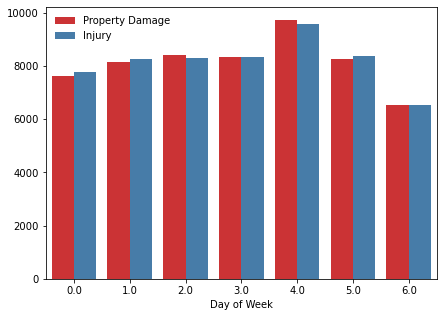

In [105]:
ax = sns.countplot(x="dayofweek", hue="SEVERITYCODE", data=df_collisions,palette="Set1")
ax.set(xlabel='Day of Week', ylabel='')
L=plt.legend(frameon=False)
L.get_texts()[1].set_text('Injury')
L.get_texts()[0].set_text('Property Damage')
fig = plt.gcf()
fig.set_size_inches(7, 5)
fig.savefig('dayofweek.png', dpi=100,bbox_inches = "tight")

plt.show()

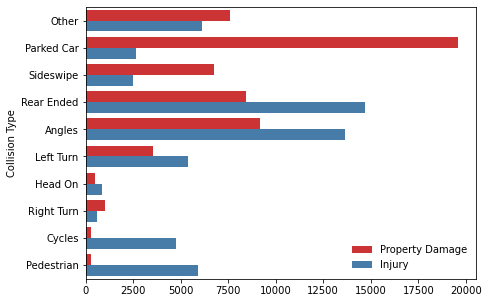

In [106]:
ax = sns.countplot(y="COLLISIONTYPE", hue="SEVERITYCODE", data=df_collisions,palette="Set1")
ax.set(xlabel='', ylabel='Collision Type')
L=plt.legend(frameon=False)
L.get_texts()[1].set_text('Injury')
L.get_texts()[0].set_text('Property Damage')
fig = plt.gcf()
fig.set_size_inches(7, 5)
fig.savefig('collision.png', dpi=100,bbox_inches = "tight")
plt.show()

In [107]:
df_collisions.groupby(['COLLISIONTYPE'])['SEVERITYCODE'].value_counts(normalize=True)

COLLISIONTYPE  SEVERITYCODE
Angles         2               0.597570
               1               0.402430
Cycles         2               0.941270
               1               0.058730
Head On        2               0.647365
               1               0.352635
Left Turn      2               0.604311
               1               0.395689
Other          1               0.553999
               2               0.446001
Parked Car     1               0.880230
               2               0.119770
Pedestrian     2               0.954648
               1               0.045352
Rear Ended     2               0.634984
               1               0.365016
Right Turn     1               0.625461
               2               0.374539
Sideswipe      1               0.729986
               2               0.270014
Name: SEVERITYCODE, dtype: float64

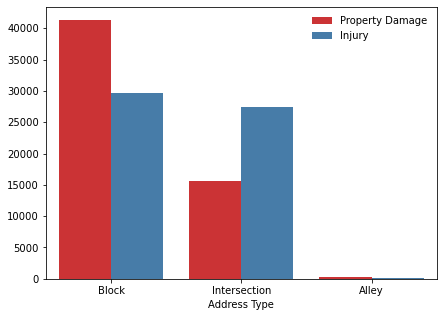

In [108]:
ax = sns.countplot(x="ADDRTYPE", hue="SEVERITYCODE", data=df_collisions,palette="Set1")
ax.set(xlabel='Address Type', ylabel='')
L=plt.legend(frameon=False)
L.get_texts()[1].set_text('Injury')
L.get_texts()[0].set_text('Property Damage')
fig = plt.gcf()
fig.set_size_inches(7, 5)
fig.savefig('address.png', dpi=100,bbox_inches = "tight")
plt.show()

In [109]:
df_collisions.groupby(['ADDRTYPE'])['SEVERITYCODE'].value_counts(normalize=True)

ADDRTYPE      SEVERITYCODE
Alley         1               0.773743
              2               0.226257
Block         1               0.582155
              2               0.417845
Intersection  2               0.638052
              1               0.361948
Name: SEVERITYCODE, dtype: float64

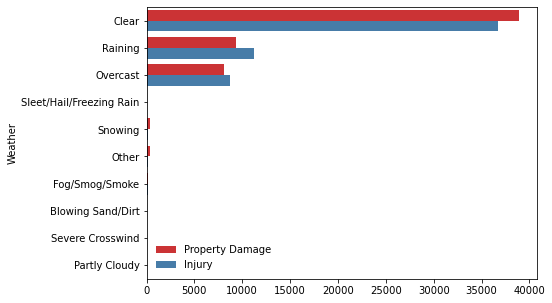

In [110]:
ax = sns.countplot(y="WEATHER", hue="SEVERITYCODE", data=df_collisions,palette="Set1")
ax.set(xlabel='', ylabel='Weather')
L=plt.legend(frameon=False)
L.get_texts()[1].set_text('Injury')
L.get_texts()[0].set_text('Property Damage')
fig = plt.gcf()
fig.set_size_inches(7, 5)
fig.savefig('weather.png', dpi=100,bbox_inches = "tight")

#plt.show()


In [111]:
df_collisions.groupby(['WEATHER'])['SEVERITYCODE'].value_counts(normalize=True)

WEATHER                   SEVERITYCODE
Blowing Sand/Dirt         1               0.571429
                          2               0.428571
Clear                     1               0.514257
                          2               0.485743
Fog/Smog/Smoke            2               0.502688
                          1               0.497312
Other                     1               0.725768
                          2               0.274232
Overcast                  2               0.519639
                          1               0.480361
Partly Cloudy             2               0.600000
                          1               0.400000
Raining                   2               0.544454
                          1               0.455546
Severe Crosswind          1               0.533333
                          2               0.466667
Sleet/Hail/Freezing Rain  1               0.508772
                          2               0.491228
Snowing                   1               0

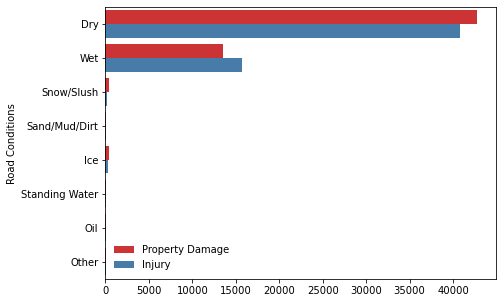

In [112]:
ax = sns.countplot(y="ROADCOND", hue="SEVERITYCODE", data=df_collisions,palette="Set1")
ax.set(xlabel='', ylabel='Road Conditions')
L=plt.legend(frameon=False)
L.get_texts()[1].set_text('Injury')
L.get_texts()[0].set_text('Property Damage')
fig = plt.gcf()
fig.set_size_inches(7, 5)
fig.savefig('roadcond.png', dpi=100,bbox_inches = "tight")
#plt.show()

In [113]:
df_collisions.groupby(['ROADCOND'])['SEVERITYCODE'].value_counts(normalize=True)

ROADCOND        SEVERITYCODE
Dry             1               0.511704
                2               0.488296
Ice             1               0.595556
                2               0.404444
Oil             2               0.648649
                1               0.351351
Other           2               0.524390
                1               0.475610
Sand/Mud/Dirt   1               0.500000
                2               0.500000
Snow/Slush      1               0.681905
                2               0.318095
Standing Water  1               0.552239
                2               0.447761
Wet             2               0.538817
                1               0.461183
Name: SEVERITYCODE, dtype: float64

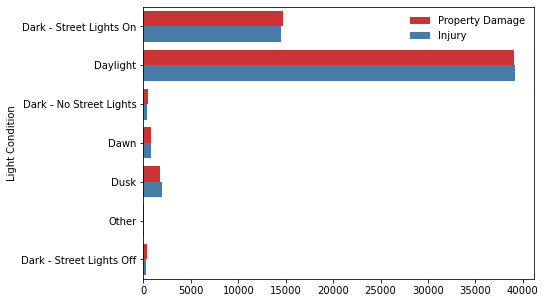

In [114]:
ax = sns.countplot(y="LIGHTCOND", hue="SEVERITYCODE", data=df_collisions,palette="Set1")
ax.set(xlabel='', ylabel='Light Condition')
L=plt.legend(frameon=False)
L.get_texts()[1].set_text('Injury')
L.get_texts()[0].set_text('Property Damage')
fig = plt.gcf()
fig.set_size_inches(7, 5)
fig.savefig('lightcond.png', dpi=100,bbox_inches = "tight")
#plt.show()



In [115]:
df_collisions.groupby(['LIGHTCOND'])['SEVERITYCODE'].value_counts(normalize=True)

LIGHTCOND                 SEVERITYCODE
Dark - No Street Lights   1               0.600956
                          2               0.399044
Dark - Street Lights Off  1               0.533235
                          2               0.466765
Dark - Street Lights On   1               0.504314
                          2               0.495686
Dawn                      2               0.524173
                          1               0.475827
Daylight                  2               0.501150
                          1               0.498850
Dusk                      2               0.533187
                          1               0.466813
Other                     1               0.617647
                          2               0.382353
Name: SEVERITYCODE, dtype: float64

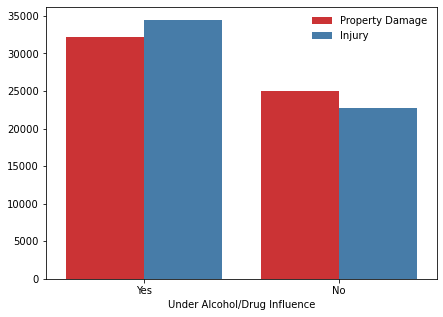

In [116]:
ax = sns.countplot(x="UNDERINFL", hue="SEVERITYCODE", data=df_collisions,palette="Set1")
ax.set(xlabel='Under Alcohol/Drug Influence', ylabel='')
L=plt.legend(frameon=False)
L.get_texts()[1].set_text('Injury')
L.get_texts()[0].set_text('Property Damage')
plt.xticks(np.arange(2), ('Yes', 'No'))
fig = plt.gcf()
fig.set_size_inches(7, 5)
fig.savefig('alcohol.png', dpi=100,bbox_inches = "tight")
plt.show()

In [117]:
df_collisions.groupby(['UNDERINFL'])['SEVERITYCODE'].value_counts(normalize=True)

UNDERINFL  SEVERITYCODE
1          2               0.516944
           1               0.483056
0          1               0.523699
           2               0.476301
Name: SEVERITYCODE, dtype: float64

In [118]:
df_collisions.groupby(['UNDERINFL'])['SEVERITYCODE'].value_counts(normalize=True)

UNDERINFL  SEVERITYCODE
1          2               0.516944
           1               0.483056
0          1               0.523699
           2               0.476301
Name: SEVERITYCODE, dtype: float64

In [119]:
df_collisions.groupby(['PERSONCOUNT'])['SEVERITYCODE'].value_counts(normalize=True)

PERSONCOUNT  SEVERITYCODE
0            2               0.514912
             1               0.485088
1            1               0.552199
             2               0.447801
2            1               0.571105
                               ...   
44           1               1.000000
48           2               1.000000
53           1               1.000000
54           2               1.000000
81           2               1.000000
Name: SEVERITYCODE, Length: 70, dtype: float64

In [120]:
df_collisions['personcountGroup'] = pd.cut(df_collisions.PERSONCOUNT,[0,5,90],labels=['0-5','>5'])

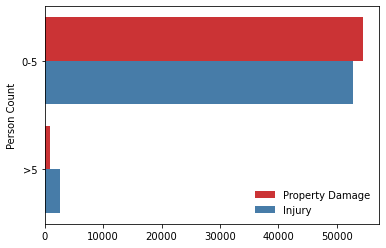

In [121]:
ax1 = sns.countplot(y="personcountGroup", hue="SEVERITYCODE", data=df_collisions,palette="Set1")
ax1.set(xlabel='', ylabel='Person Count')
L=plt.legend(frameon=False)
L.get_texts()[1].set_text('Injury')
L.get_texts()[0].set_text('Property Damage')
plt.savefig('personcount.png')
#plt.show()

In [122]:
df_collisions.groupby(['PEDCOUNT'])['SEVERITYCODE'].value_counts(normalize=True)

PEDCOUNT  SEVERITYCODE
0         1               0.527587
          2               0.472413
1         2               0.953643
          1               0.046357
2         2               0.990431
          1               0.009569
3         2               1.000000
4         2               1.000000
5         2               1.000000
6         2               1.000000
Name: SEVERITYCODE, dtype: float64

In [123]:
df_collisions['vehcountgroup'] = pd.cut(df_collisions.PERSONCOUNT,[0,2,4,6,8,10,12],labels=['0-2','2-4','4-6','6-8','8-10','10-12'])

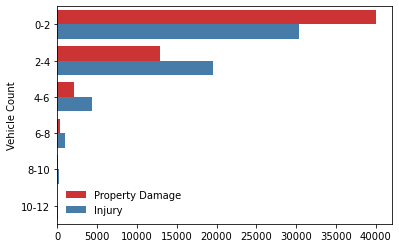

In [124]:
ax1 = sns.countplot(y="vehcountgroup", hue="SEVERITYCODE", data=df_collisions,palette="Set1")
ax1.set(xlabel='', ylabel='Vehicle Count')
L=plt.legend(frameon=False)
L.get_texts()[1].set_text('Injury')
L.get_texts()[0].set_text('Property Damage')
plt.savefig('vehcount.png')
#plt.show()

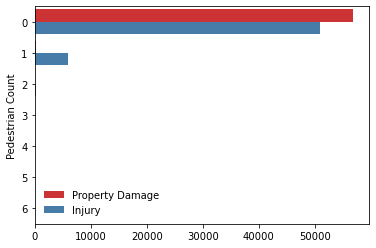

In [125]:
ax1 = sns.countplot(y="PEDCOUNT", hue="SEVERITYCODE", data=df_collisions,palette="Set1")
ax1.set(xlabel='', ylabel='Pedestrian Count')
L=plt.legend(frameon=False)
L.get_texts()[1].set_text('Injury')
L.get_texts()[0].set_text('Property Damage')
plt.savefig('pedcount.png')
#plt.show()

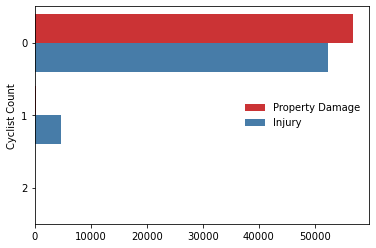

In [126]:
ax1 = sns.countplot(y="PEDCYLCOUNT", hue="SEVERITYCODE", data=df_collisions,palette="Set1")
ax1.set(xlabel='', ylabel='Cyclist Count')
L=plt.legend(frameon=False)
L.get_texts()[1].set_text('Injury')
L.get_texts()[0].set_text('Property Damage')
plt.savefig('cyclistcount.png')
#plt.show()

In [127]:
data_encoded_addr=pd.get_dummies(df_collisions['ADDRTYPE'])


In [128]:
data_encoded_coll=pd.get_dummies(df_collisions['COLLISIONTYPE'])
data_encoded_coll.drop(['Other'], axis = 1,inplace=True)


In [129]:
data_encoded_weather=pd.get_dummies(df_collisions['WEATHER'])
data_encoded_weather.drop(['Other','Fog/Smog/Smoke','Sleet/Hail/Freezing Rain'], axis = 1,inplace=True)


In [130]:
data_encoded_road=pd.get_dummies(df_collisions['ROADCOND'])
data_encoded_road.drop(['Other','Sand/Mud/Dirt'], axis = 1,inplace=True)


In [131]:
data_encoded_light=pd.get_dummies(df_collisions['LIGHTCOND'])
data_encoded_light.drop(['Other','Dark - Street Lights On','Daylight'], axis = 1,inplace=True)


In [132]:
data_encoded_person=pd.get_dummies(df_collisions['personcountGroup'])


In [133]:
Feature = df_collisions[['PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','UNDERINFL']]
Feature = pd.concat([Feature,data_encoded_person], axis=1)


In [134]:
Feature.rename(columns = {'0-5': 'PersonGroup 0-5', '>5': 'PersonGroup >5'}, inplace = True)

In [135]:
Feature = pd.concat([Feature,data_encoded_addr,data_encoded_coll], axis=1)

In [136]:
Feature = pd.concat([Feature,data_encoded_weather,data_encoded_road,data_encoded_light], axis=1)

In [137]:
X = Feature
X[0:5]

,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,UNDERINFL,PersonGroup 0-5,PersonGroup >5,Alley,Block,Intersection,Angles,...,Dry,Ice,Oil,Snow/Slush,Standing Water,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dawn,Dusk
0,0,0,1,1,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,2,1,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,1,1,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,2,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,2,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [138]:
y = df_collisions['SEVERITYCODE'].values
y[0:5]

array([1, 1, 1, 1, 1])

In [139]:
from sklearn import preprocessing
%matplotlib inline

In [148]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

SyntaxError: invalid syntax (<ipython-input-148-da31bd996657>, line 18)

In [141]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, object were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


array([[-0.2398803 , -0.21525488, -1.56857858,  0.84557509,  0.25515956,
        -0.1794885 , -0.05604818,  0.78111513, -0.77592708, -0.49911144,
        -0.21475581, -0.10919342, -0.29151325, -0.49126405, -0.23983275,
        -0.50356479, -0.12011849, -0.29725016, -0.01750005,  0.71595354,
        -0.41547691, -0.00661353, -0.46781865, -0.01145547, -0.06479816,
         0.6055406 , -0.07706847, -0.01799327, -0.06792319, -0.02421607,
        -0.58623932, -0.08588105, -0.07718324, -0.11807878, -0.18150372],
       [-0.2398803 , -0.21525488,  0.08027942,  0.84557509,  0.25515956,
        -0.1794885 , -0.05604818,  0.78111513, -0.77592708, -0.49911144,
        -0.21475581, -0.10919342, -0.29151325,  2.03556518, -0.23983275,
        -0.50356479, -0.12011849, -0.29725016, -0.01750005,  0.71595354,
        -0.41547691, -0.00661353, -0.46781865, -0.01145547, -0.06479816,
         0.6055406 , -0.07706847, -0.01799327, -0.06792319, -0.02421607,
        -0.58623932, -0.08588105, -0.07718324, -0.

K NEAREST NEIGHBOR (KNN)

In [142]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.1, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (102888, 35) (102888,)
Test set: (11432, 35) (11432,)


In [143]:
from sklearn.neighbors import KNeighborsClassifier
k = 13
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=13, p=2,
           weights='uniform')

In [144]:
yhatKNN = neigh.predict(X_test)
yhatKNN[0:5]

array([1, 2, 1, 2, 2])

In [145]:
y_test[0:5]

array([1, 2, 1, 1, 2])

In [146]:
#Ks = 15th
#mean_acc = np.zeros((Ks-1))
#std_acc = np.zeros((Ks-1))
#ConfustionMx = [];
#for n in range(1,Ks):
    
 #   neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
  #  yhat=neigh.predict(X_test)
   # mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    #std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

#mean_acc

              precision    recall  f1-score   support

           1       0.71      0.65      0.68      5725
           2       0.68      0.74      0.71      5707

   micro avg       0.69      0.69      0.69     11432
   macro avg       0.69      0.69      0.69     11432
weighted avg       0.69      0.69      0.69     11432

Confusion matrix, without normalization
[[3697 2028]
 [1490 4217]]


<Figure size 504x360 with 0 Axes>

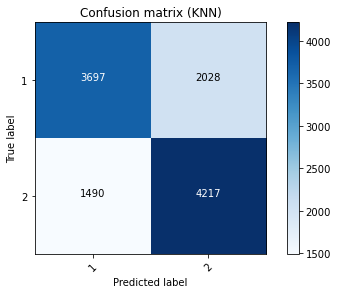

In [151]:
cnf_matrix = confusion_matrix(y_test, yhatKNN, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhatKNN))
fig = plt.gcf()
fig.set_size_inches(7, 5)
fig.savefig('confusionKNN.png', dpi=100,bbox_inches = "tight")

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[1,2],normalize= False,  title='Confusion matrix (KNN)')

from sklearn.metrics import f1_score
KNNF1 = f1_score(y_test, yhatKNN, average='weighted')

from sklearn.metrics import jaccard_similarity_score
KNNJAC = jaccard_similarity_score(y_test, yhatKNN)

In [152]:
KNNF1

0.6916072128668738

In [153]:
KNNJAC

0.6922673198040588

In [154]:
#plt.plot(range(1,Ks),mean_acc,'g')
#plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
#plt.legend(('Accuracy ', '+/- 3xstd'))
#plt.ylabel('Accuracy ')
#plt.xlabel('Number of Neighbours (K)')
#plt.tight_layout()
#fig = plt.gcf()
#fig.set_size_inches(7, 5)
#fig.savefig('knn.png', dpi=100,bbox_inches = "tight")
#plt.show()

In [155]:
#print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

DECISION TREE

In [156]:
from sklearn.tree import DecisionTreeClassifier
depth = 13
AccTree = DecisionTreeClassifier(criterion="entropy", max_depth = depth)
AccTree 

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=13,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [157]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split( X, y, test_size=0.3, random_state=3)
print ('Train set:', X_trainset.shape,  y_trainset.shape)
print ('Test set:', X_testset.shape,  y_testset.shape)
AccTree.fit(X_trainset,y_trainset)

Train set: (80024, 35) (80024,)
Test set: (34296, 35) (34296,)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=13,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [158]:
predTree = AccTree.predict(X_testset)
print (predTree [0:5])
print (y_testset [0:5])
The dec

[1 2 1 2 2]
[1 1 1 1 2]


In [160]:
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.7031140657802659


              precision    recall  f1-score   support

           1       0.75      0.62      0.68     17290
           2       0.67      0.78      0.72     17006

   micro avg       0.70      0.70      0.70     34296
   macro avg       0.71      0.70      0.70     34296
weighted avg       0.71      0.70      0.70     34296

Confusion matrix, without normalization
[[10769  6521]
 [ 3661 13345]]


<Figure size 504x360 with 0 Axes>

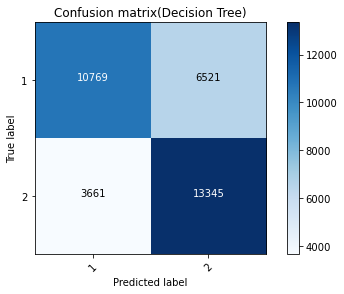

In [161]:
cnf_matrix = confusion_matrix(y_testset, predTree, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(y_testset, predTree))
fig = plt.gcf()
fig.set_size_inches(7, 5)
fig.savefig('confusionDT.png', dpi=100,bbox_inches = "tight")

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[1,2],normalize= False,  title='Confusion matrix(Decision Tree)')

from sklearn.metrics import f1_score
DTF1 = f1_score(y_testset, predTree, average='weighted')

from sklearn.metrics import jaccard_similarity_score
DTJAC = jaccard_similarity_score(y_testset, predTree)

In [162]:
DTF1

0.7012439364555906

In [163]:
DTJAC

0.7031140657802659

In [164]:
max_depth = 15
depth = 1
lists = [[],[]]

for m in range(3,max_depth):
    # modelling
    AccTree = DecisionTreeClassifier(criterion="entropy", max_depth = m)
   # AccTree
    AccTree.fit(X_trainset, y_trainset)
    yhatset = AccTree.predict(X_testset)

    acc = metrics.accuracy_score(y_testset, yhatset)
        
    lists[0].append(acc)
    lists[1].append(m)
    if acc== max(lists[0]):
        best_acc = acc
        best_max_depth = m
        best_tree = AccTree

print("The best accuracy of Decision Tree is ", best_acc, "with a max depth of", best_max_depth)
#lists

The best accuracy of Decision Tree is  0.7030557499416842 with a max depth of 13


In [165]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

In [166]:
feature_cols = Feature.columns[0:36]
feature_cols

Index(['PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'UNDERINFL', 'PersonGroup 0-5',
       'PersonGroup >5', 'Alley', 'Block', 'Intersection', 'Angles', 'Cycles',
       'Head On', 'Left Turn', 'Parked Car', 'Pedestrian', 'Rear Ended',
       'Right Turn', 'Sideswipe', 'Blowing Sand/Dirt', 'Clear', 'Overcast',
       'Partly Cloudy', 'Raining', 'Severe Crosswind', 'Snowing', 'Dry', 'Ice',
       'Oil', 'Snow/Slush', 'Standing Water', 'Wet', 'Dark - No Street Lights',
       'Dark - Street Lights Off', 'Dawn', 'Dusk'],
      dtype='object')

In [167]:
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pydotplus-2.0.2            |     pyhd1c1de3_3          23 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          23 KB

The following NEW packages will be INSTALLED:

  pydotplus          conda-forge/noarch::pydotplus-2.0.2-pyhd1c1de3_3



pydotplus-2.0.2      | 23 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - python-graphviz


The following packages will be downloaded:

    package 

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.500176 to fit



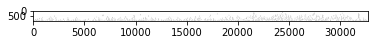

In [168]:
depth = 13
dtree = DecisionTreeClassifier(criterion="entropy", max_depth = depth)
dtree = dtree.fit(X_trainset, y_trainset)
data = tree.export_graphviz(dtree, out_file=None, feature_names=feature_cols)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree.png')

img=mpimg.imread('mydecisiontree.png')
imgplot = plt.imshow(img)
plt.show()

SUPPORT VECTOR MACHINES 

In [170]:
Feature['UNDERINFL'] = Feature['UNDERINFL'].astype('int')

In [171]:
Feature.dtypes

PEDCOUNT                    int64
PEDCYLCOUNT                 int64
VEHCOUNT                    int64
UNDERINFL                   int64
PersonGroup 0-5             uint8
PersonGroup >5              uint8
Alley                       uint8
Block                       uint8
Intersection                uint8
Angles                      uint8
Cycles                      uint8
Head On                     uint8
Left Turn                   uint8
Parked Car                  uint8
Pedestrian                  uint8
Rear Ended                  uint8
Right Turn                  uint8
Sideswipe                   uint8
Blowing Sand/Dirt           uint8
Clear                       uint8
Overcast                    uint8
Partly Cloudy               uint8
Raining                     uint8
Severe Crosswind            uint8
Snowing                     uint8
Dry                         uint8
Ice                         uint8
Oil                         uint8
Snow/Slush                  uint8
Standing Water

In [172]:
Feature['PersonGroup 0-5'] =Feature['PersonGroup 0-5'].astype('int')

In [173]:
Feature[['PersonGroup >5','Alley']] = Feature[['PersonGroup 0-5','Alley']].astype('int')

In [174]:
Feature[['Block', 'Intersection', 'Angles', 'Cycles',
       'Head On', 'Left Turn', 'Parked Car', 'Pedestrian', 'Rear Ended',
       'Right Turn', 'Sideswipe', 'Blowing Sand/Dirt', 'Clear', 'Overcast',
       'Partly Cloudy', 'Raining', 'Severe Crosswind', 'Snowing', 'Dry', 'Ice',
       'Oil', 'Snow/Slush', 'Standing Water', 'Wet', 'Dark - No Street Lights',
       'Dark - Street Lights Off', 'Dawn', 'Dusk']] = Feature[['Block', 'Intersection', 'Angles', 'Cycles',
       'Head On', 'Left Turn', 'Parked Car', 'Pedestrian', 'Rear Ended',
       'Right Turn', 'Sideswipe', 'Blowing Sand/Dirt', 'Clear', 'Overcast',
       'Partly Cloudy', 'Raining', 'Severe Crosswind', 'Snowing', 'Dry', 'Ice',
       'Oil', 'Snow/Slush', 'Standing Water', 'Wet', 'Dark - No Street Lights',
       'Dark - Street Lights Off', 'Dawn', 'Dusk']].astype('int')

In [175]:
Feature.dtypes

PEDCOUNT                    int64
PEDCYLCOUNT                 int64
VEHCOUNT                    int64
UNDERINFL                   int64
PersonGroup 0-5             int64
PersonGroup >5              int64
Alley                       int64
Block                       int64
Intersection                int64
Angles                      int64
Cycles                      int64
Head On                     int64
Left Turn                   int64
Parked Car                  int64
Pedestrian                  int64
Rear Ended                  int64
Right Turn                  int64
Sideswipe                   int64
Blowing Sand/Dirt           int64
Clear                       int64
Overcast                    int64
Partly Cloudy               int64
Raining                     int64
Severe Crosswind            int64
Snowing                     int64
Dry                         int64
Ice                         int64
Oil                         int64
Snow/Slush                  int64
Standing Water

In [176]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [177]:
yhatSVM = clf.predict(X_test)
yhatSVM [0:5]

array([1, 2, 1, 2, 2])

In [178]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [179]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           1       0.74      0.64      0.69      5725
           2       0.68      0.78      0.73      5707

   micro avg       0.71      0.71      0.71     11432
   macro avg       0.71      0.71      0.71     11432
weighted avg       0.71      0.71      0.71     11432

Confusion matrix, without normalization
[[3653 2072]
 [1256 4451]]


<Figure size 504x360 with 0 Axes>

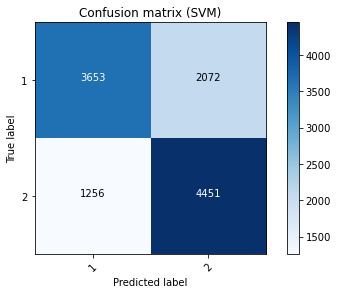

In [180]:
cnf_matrix = confusion_matrix(y_test, yhatSVM, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhatSVM))
fig = plt.gcf()
fig.set_size_inches(7, 5)
fig.savefig('confusionSVM.png', dpi=100,bbox_inches = "tight")

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[1,2],normalize= False,  title='Confusion matrix (SVM)')

from sklearn.metrics import f1_score
SVMf1 = f1_score(y_test, yhatSVM, average='weighted')

from sklearn.metrics import jaccard_similarity_score
SVMJAC = jaccard_similarity_score(y_test, yhatSVM)

In [181]:
SVMf1

0.707429758369748

In [182]:
SVMJAC

0.70888733379986

LOGISTIC REGRESSION


In [183]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.24, -0.22, -1.57,  0.85,  0.26, -0.18, -0.06,  0.78, -0.78,
        -0.5 , -0.21, -0.11, -0.29, -0.49, -0.24, -0.5 , -0.12, -0.3 ,
        -0.02,  0.72, -0.42, -0.01, -0.47, -0.01, -0.06,  0.61, -0.08,
        -0.02, -0.07, -0.02, -0.59, -0.09, -0.08, -0.12, -0.18],
       [-0.24, -0.22,  0.08,  0.85,  0.26, -0.18, -0.06,  0.78, -0.78,
        -0.5 , -0.21, -0.11, -0.29,  2.04, -0.24, -0.5 , -0.12, -0.3 ,
        -0.02,  0.72, -0.42, -0.01, -0.47, -0.01, -0.06,  0.61, -0.08,
        -0.02, -0.07, -0.02, -0.59, -0.09, -0.08, -0.12, -0.18],
       [-0.24, -0.22, -1.57,  0.85,  0.26, -0.18, -0.06,  0.78, -0.78,
        -0.5 , -0.21, -0.11, -0.29, -0.49, -0.24, -0.5 , -0.12, -0.3 ,
        -0.02, -1.4 , -0.42, -0.01,  2.14, -0.01, -0.06, -1.65, -0.08,
        -0.02, -0.07, -0.02,  1.71, -0.09, -0.08, -0.12, -0.18],
       [-0.24, -0.22,  0.08, -1.18,  0.26, -0.18, -0.06,  0.78, -0.78,
        -0.5 , -0.21, -0.11, -0.29, -0.49, -0.24, -0.5 , -0.12, -0.3 ,
        -0.02,  0.72, -0

In [184]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train1.shape,  y_train1.shape)
print ('Test set:', X_test1.shape,  y_test1.shape)

Train set: (91456, 35) (91456,)
Test set: (22864, 35) (22864,)


In [185]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train1,y_train1)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [186]:
yhatLR = LR.predict(X_test1)
yhatLR

array([1, 2, 1, ..., 2, 1, 1])

In [187]:
yhat_prob = LR.predict_proba(X_test1)
yhat_prob

array([[0.9 , 0.1 ],
       [0.41, 0.59],
       [0.89, 0.11],
       ...,
       [0.13, 0.87],
       [0.62, 0.38],
       [0.9 , 0.1 ]])

Confusion matrix, without normalization
[[6664 4788]
 [2113 9299]]
              precision    recall  f1-score   support

           1       0.76      0.58      0.66     11452
           2       0.66      0.81      0.73     11412

   micro avg       0.70      0.70      0.70     22864
   macro avg       0.71      0.70      0.69     22864
weighted avg       0.71      0.70      0.69     22864



<Figure size 504x360 with 0 Axes>

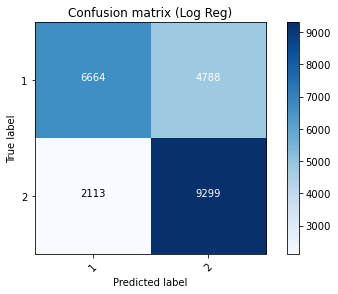

In [188]:
cnf_matrix = confusion_matrix(y_test1, yhatLR, labels=[1,2])
np.set_printoptions(precision=2)
fig = plt.gcf()
fig.set_size_inches(7, 5)
fig.savefig('confusionLR.png', dpi=100,bbox_inches = "tight")


plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[1,2],normalize= False,  title='Confusion matrix (Log Reg)')


print (classification_report(y_test1, yhatLR))
from sklearn.metrics import f1_score
LRf1 = f1_score(y_test1, yhatLR, average='weighted')

from sklearn.metrics import jaccard_similarity_score
LRJAC = jaccard_similarity_score(y_test1, yhatLR)

from sklearn.metrics import log_loss
LRLog = log_loss(y_test1, yhat_prob)

In [224]:
TP = cnf_matrix[1, 1]
TN = cnf_matrix[0, 0]
FP = cnf_matrix[0, 1]
FN = cnf_matrix[1, 0]

In [231]:
from sklearn.metrics import accuracy_score
print('Accuracy Score Log Reg:',accuracy_score(y_test1, yhatLR))

Accuracy Score Log Reg: 0.6981717984604618


In [225]:
TP

9299

In [226]:
TN

6664

In [227]:
FP

4788

In [228]:
FN

2113

In [189]:
LRf1

0.6940473426157778

In [190]:
LRJAC

0.6981717984604618

In [191]:
LRLog

0.5483573977904034

In [192]:
DataEval = {'Algorithm':['KNN','Decision Tree','SVM','LogisticRegression'],'Jaccard':[KNNJAC,DTJAC,SVMJAC,LRJAC],'F1-score':[KNNF1,DTF1,SVMf1,LRf1],'LogLoss':['NA','NA','NA',LRLog]}
df_eval = pd.DataFrame(DataEval)
df_eval

,Algorithm,Jaccard,F1-score,LogLoss
0,KNN,0.692267,0.691607,NA
1,Decision Tree,0.703114,0.701244,NA
2,SVM,0.708887,0.707430,NA
3,LogisticRegression,0.698172,0.694047,0.548357


In [201]:
yhat_prob[0:5]


array([[0.9 , 0.1 ],
       [0.41, 0.59],
       [0.89, 0.11],
       [0.43, 0.57],
       [0.39, 0.61]])

In [202]:
y_test1[0:5]

array([1, 2, 1, 1, 2])

In [203]:
yhatLR[0:5]

array([1, 2, 1, 2, 2])

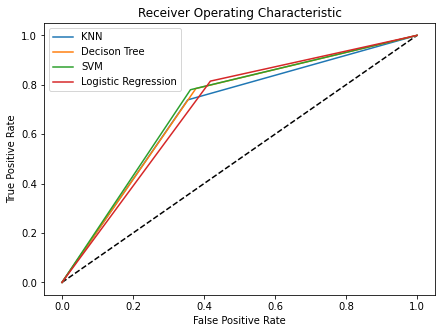

In [223]:
from sklearn.metrics import roc_curve
#y_pred_prob1 = neigh.predict_proba(X_test)[:,1]
fpr1 , tpr1, thresholds1 = roc_curve(y_test, yhatKNN,pos_label=2)

#y_pred_prob2 = AccTree.predict_proba(X_testset)[:,1]
fpr2 , tpr2, thresholds2 = roc_curve(y_testset, predTree,pos_label=2)


#y_pred_prob3 = clf.predict_proba(X_test)[:,1]
fpr3 , tpr3, thresholds3 = roc_curve(y_test, yhatSVM,pos_label=2)

#y_pred_prob4 = LR.predict_proba(X_test1)[:,1]
fpr4 , tpr4, thresholds4 = roc_curve(y_test1, yhatLR,pos_label=2)


plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "KNN")
plt.plot(fpr2, tpr2, label= "Decison Tree")
plt.plot(fpr3, tpr3, label= "SVM")
plt.plot(fpr4, tpr4, label= "Logistic Regression")
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('Receiver Operating Characteristic')
fig = plt.gcf()
fig.set_size_inches(7, 5)
fig.savefig('ROC.png', dpi=100,bbox_inches = "tight")
plt.show()

In [234]:
from sklearn.metrics import accuracy_score
print('Accuracy Score KNN',accuracy_score(y_test, yhatKNN))
print('Accuracy Score Decision Tree:',accuracy_score(y_testset, predTree))
print('Accuracy Score SVM:',accuracy_score(y_test, yhatSVM))
print('Accuracy Score Log Reg:',accuracy_score(y_test1, yhatLR))

Accuracy Score KNN 0.6922673198040588
Accuracy Score Decision Tree: 0.7031140657802659
Accuracy Score SVM: 0.70888733379986
Accuracy Score Log Reg: 0.6981717984604618
